In [1]:
import numpy as np
import pandas as pd


data = pd.read_csv("..\données\drought.csv")
data = data.drop(columns=['0','-9'])
data['DATE'] = pd.to_datetime(data['DATE'],format='d_%Y%m%d')
data['state'] =pd.Categorical(data['state'])
data['DSCI'] = data.D0 + data.D1 + data.D2 + data.D3 + data.D4

# Pour simplifier, nous étudions des séries temporelles univariées
data = data.drop(columns=['D0','D1','D2','D3','D4','W0','W1','W2','W3','W4'])
data

,DATE,state,DSCI
0,1895-01-01,alabama,0.0
1,1895-02-01,alabama,0.0
2,1895-03-01,alabama,0.0
3,1895-04-01,alabama,0.0
4,1895-05-01,alabama,0.0
...,...,...,...
73339,2021-12-01,wyoming,108.7
73340,2022-01-01,wyoming,85.7
73341,2022-02-01,wyoming,86.1
73342,2022-03-01,wyoming,50.0


In [2]:
# Nous nous concentrons d'abord sur les données de l'état de l'Alabama
X = data[data.state=='california'].sort_values('DATE')
X = X.drop(columns=['state']).sort_values('DATE').set_index('DATE')
X = X.reset_index()
X["DATE"] = X["DATE"].astype(str)
X["year"] = X["DATE"].str[0:4].astype(int)
X["month"] = X["DATE"].str[5:7].astype(int)
X["day"] = X["DATE"].str[8:10].astype(int)
X["1mago"] = X["DSCI"].shift(-1)
X["2mago"] = X["DSCI"].shift(-2)
X["3mago"] = X["DSCI"].shift(-3)
X = X.dropna()

y = X.DSCI
X = X.drop(columns=["DATE","DSCI"])
X

,year,month,day,1mago,2mago,3mago
0,1895,1,1,0.0,0.0,0.0
1,1895,2,1,0.0,0.0,0.0
2,1895,3,1,0.0,0.0,0.0
3,1895,4,1,0.0,0.0,0.0
4,1895,5,1,0.0,0.0,0.0
...,...,...,...,...,...,...
1520,2021,9,1,165.6,156.3,14.5
1521,2021,10,1,156.3,14.5,43.4
1522,2021,11,1,14.5,43.4,104.0
1523,2021,12,1,43.4,104.0,161.6


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.9,shuffle=False)
rf_model = RandomForestRegressor(max_depth=3,n_estimators=140,min_samples_split=18)
rf_model.fit(X_train,y_train)#模型拟合
res = rf_model.predict(X_test)

3065.16990180882

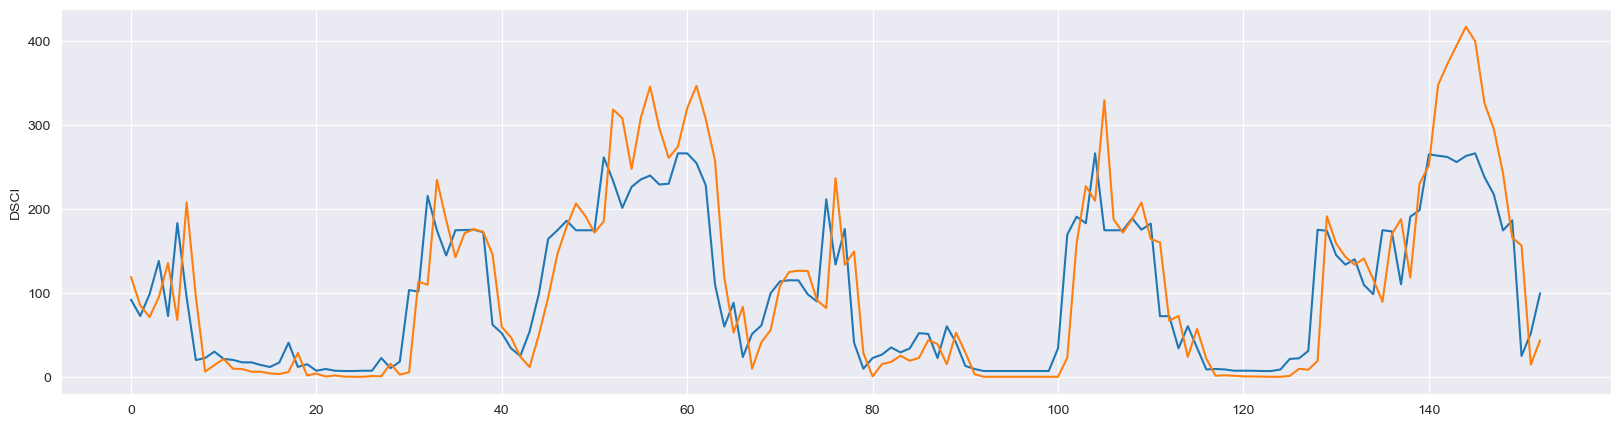

In [54]:
import seaborn as sns
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
y_test = y_test.reset_index(drop=True)
plt.figure(figsize=(20,5))
ax11=sns.lineplot(res)
sns.lineplot(y_test,ax=ax11)
mean_squared_error(res,y_test)
# rf_model.oob_score_

In [5]:
RMSE = mean_squared_error(res,y_test)**0.5
RMSE

58.010415209488826

In [31]:
from sklearn.model_selection import GridSearchCV
param_test1 = {'n_estimators':range(10,200,10)}
gsearch1 = GridSearchCV(estimator = RandomForestRegressor(),
                        param_grid = param_test1)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 140}, 0.6194243305158222)

In [36]:
param_test2 = {'max_depth':range(1,10,1), 'min_samples_split':range(2,40,2)}
gsearch2 = GridSearchCV(estimator = RandomForestRegressor(n_estimators=140),
                                     param_grid = param_test2)
gsearch2.fit(X_train,y_train)
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 3, 'min_samples_split': 18}, 0.6550979835043201)